In [1]:
import numpy as np
import pandas as pd
import statistics
import pylab
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


print("Aluno: Gabriel Barbosa Menezes Dantas")
print("Este bloco inicializa as bibliotecas utilizadas na atividade.")

Aluno: Gabriel Barbosa Menezes Dantas
Este bloco inicializa as bibliotecas utilizadas na atividade.


In [2]:
print("Questão 1, item a): organizando o dataset e o dividindo entre conjuntos de treino, teste e validação.")
X = pd.DataFrame(
    {'sepalL' : [5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1,5.4,5.1,4.6,5.1,4.8,5.0,5.0,5.2,5.2,4.7,4.8,5.4,5.2,5.5,4.9,5.0,5.5,4.9,4.4,5.1,5.0,4.5,4.4,5.0,5.1,4.8,5.1,4.6,5.3,5.0,7.0,6.4,6.9,5.5,6.5,5.7,6.3,4.9,6.6,5.2,5.0,5.9,6.0,6.1,5.6,6.7,5.6,5.8,6.2,5.6,5.9,6.1,6.3,6.1,6.4,6.6,6.8,6.7,6.0,5.7,5.5,5.5,5.8,6.0,5.4,6.0,6.7,6.3,5.6,5.5,5.5,6.1,5.8,5.0,5.6,5.7,5.7,6.2,5.1,5.7,6.3,5.8,7.1,6.3,6.5,7.6,4.9,7.3,6.7,7.2,6.5,6.4,6.8,5.7,5.8,6.4,6.5,7.7,7.7,6.0,6.9,5.6,7.7,6.3,6.7,7.2,6.2,6.1,6.4,7.2,7.4,7.9,6.4,6.3,6.1,7.7,6.3,6.4,6.0,6.9,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9],
'sepalW' : [3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8,3.4,3.7,3.6,3.3,3.4,3.0,3.4,3.5,3.4,3.2,3.1,3.4,4.1,4.2,3.1,3.2,3.5,3.6,3.0,3.4,3.5,2.3,3.2,3.5,3.8,3.0,3.8,3.2,3.7,3.3,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,2.7,2.0,3.0,2.2,2.9,2.9,3.1,3.0,2.7,2.2,2.5,3.2,2.8,2.5,2.8,2.9,3.0,2.8,3.0,2.9,2.6,2.4,2.4,2.7,2.7,3.0,3.4,3.1,2.3,3.0,2.5,2.6,3.0,2.6,2.3,2.7,3.0,2.9,2.9,2.5,2.8,3.3,2.7,3.0,2.9,3.0,3.0,2.5,2.9,2.5,3.6,3.2,2.7,3.0,2.5,2.8,3.2,3.0,3.8,2.6,2.2,3.2,2.8,2.8,2.7,3.3,3.2,2.8,3.0,2.8,3.0,2.8,3.8,2.8,2.8,2.6,3.0,3.4,3.1,3.0,3.1,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0],
'petalL' : [1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5,1.7,1.5,1.0,1.7,1.9,1.6,1.6,1.5,1.4,1.6,1.6,1.5,1.5,1.4,1.5,1.2,1.3,1.4,1.3,1.5,1.3,1.3,1.3,1.6,1.9,1.4,1.6,1.4,1.5,1.4,4.7,4.5,4.9,4.0,4.6,4.5,4.7,3.3,4.6,3.9,3.5,4.2,4.0,4.7,3.6,4.4,4.5,4.1,4.5,3.9,4.8,4.0,4.9,4.7,4.3,4.4,4.8,5.0,4.5,3.5,3.8,3.7,3.9,5.1,4.5,4.5,4.7,4.4,4.1,4.0,4.4,4.6,4.0,3.3,4.2,4.2,4.2,4.3,3.0,4.1,6.0,5.1,5.9,5.6,5.8,6.6,4.5,6.3,5.8,6.1,5.1,5.3,5.5,5.0,5.1,5.3,5.5,6.7,6.9,5.0,5.7,4.9,6.7,4.9,5.7,6.0,4.8,4.9,5.6,5.8,6.1,6.4,5.6,5.1,5.6,6.1,5.6,5.5,4.8,5.4,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1],
'petalW' : [0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3,0.2,0.4,0.2,0.5,0.2,0.2,0.4,0.2,0.2,0.2,0.2,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0.2,0.6,0.4,0.3,0.2,0.2,0.2,0.2,1.4,1.5,1.5,1.3,1.5,1.3,1.6,1.0,1.3,1.4,1.0,1.5,1.0,1.4,1.3,1.4,1.5,1.0,1.5,1.1,1.8,1.3,1.5,1.2,1.3,1.4,1.4,1.7,1.5,1.0,1.1,1.0,1.2,1.6,1.5,1.6,1.5,1.3,1.3,1.3,1.2,1.4,1.2,1.0,1.3,1.2,1.3,1.3,1.1,1.3,2.5,1.9,2.1,1.8,2.2,2.1,1.7,1.8,1.8,2.5,2.0,1.9,2.1,2.0,2.4,2.3,1.8,2.2,2.3,1.5,2.3,2.0,2.0,1.8,2.1,1.8,1.8,1.8,2.1,1.6,1.9,2.0,2.2,1.5,1.4,2.3,2.4,1.8,1.8,2.1,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8]
}
)
y = ['setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','setosa','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','versicolor','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica','virginica']

X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,random_state = 44)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,test_size=0.625,random_state = 44)

Questão 1, item a): organizando o dataset e o dividindo entre conjuntos de treino, teste e validação.


In [3]:
print("Questão 1, item c)")

print("Modelo com kernel rbf e estratégia um contra um.")
modelo1 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',decision_function_shape='ovo'))
modelo1.fit(X_train, y_train)

print("Modelo com kernel rbf e estratégia um contra todos.")
modelo2 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',decision_function_shape='ovr'))
modelo2.fit(X_train, y_train)

print("Modelo com kernel sigmoid e estratégia um contra um.")
modelo3 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid',decision_function_shape='ovo'))
modelo3.fit(X_train, y_train)

print("Modelo com kernel sigmoid e estratégia um contra todos.")
modelo4 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid',decision_function_shape='ovr'))
modelo4.fit(X_train, y_train)

Questão 2, item c)
Modelo com kernel rbf e estratégia um contra um.
Modelo com kernel rbf e estratégia um contra todos.
Modelo com kernel sigmoid e estratégia um contra um.
Modelo com kernel sigmoid e estratégia um contra todos.


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [6]:
print("Questão 1, item c)")
print("Avaliando os modelos criados.")
print(modelo1.score(X_val, y_val))
print(modelo2.score(X_val, y_val))
print(modelo3.score(X_val, y_val))
print(modelo4.score(X_val, y_val))

Questão 1, item c)
Avaliando os modelos criados.
1.0
1.0
0.9473684210526315
0.9473684210526315


In [5]:
print("Questão 1, item d)")

print("Um modelo SVM funciona um pouco diferente de outros modelos de classificação.")
print("A maior diferença é que, no treino, ao invés de procurar por características comuns,")
print("o SVM procura por exemplos mais similares entre as classes. Assim, o modelo")
print("consegue traçar uma linha equidistante e otimizada entre estes exemplos e assim")
print("classificar novos exemplos.")

print("Avaliando os modelos criados de acordo com o conjunto de teste.")
print(modelo1.score(X_train, y_train))
print(modelo2.score(X_train, y_train))
print(modelo3.score(X_train, y_train))
print(modelo4.score(X_train, y_train))

Questão 1, item d)
Um modelo SVM funciona um pouco diferente de outros modelos de classificação.
A maior diferença é que, no treino, ao invés de procurar por características comuns,
o SVM procura por exemplos mais similares entre as classes. Assim, o modelo
consegue traçar uma linha equidistante e otimizada entre estes exemplos e assim
classificar novos exemplos.
Avaliando os modelos criados de acordo com o conjunto de teste.
0.9666666666666667
0.9666666666666667
0.9
0.9


Questão 1, item e): Testes de desempenho
Teste de Acurácia do sklearn do modelo 1:  0.9545454545454546
Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 1 8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.11111111 0.88888889]]


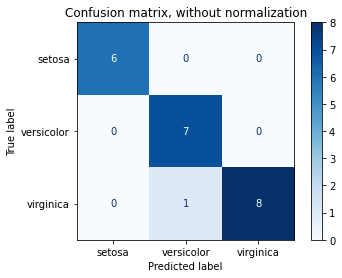

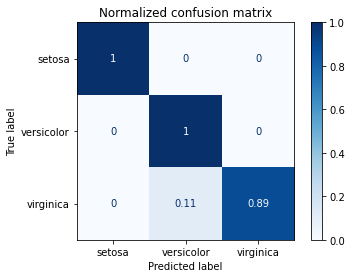

In [13]:
print("Questão 1, item e): Testes de desempenho")
print("Teste de Acurácia do sklearn do modelo 1: ",accuracy_score(y_test, modelo1.predict(X_test)))

print("Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo1, X_test, y_test,
                                 display_labels=['setosa','versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn modelo 2:  0.9545454545454546
Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 1 8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.11111111 0.88888889]]


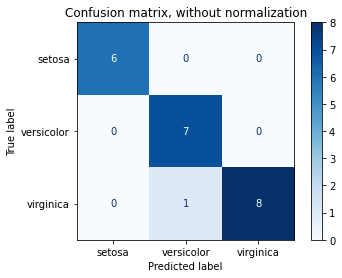

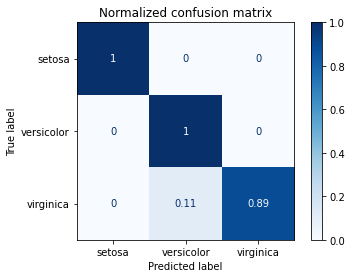

In [14]:
print("Teste de Acurácia do sklearn modelo 2: ",accuracy_score(y_test, modelo2.predict(X_test)))

print("Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo2, X_test, y_test,
                                 display_labels=['setosa','versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn modelo 3:  0.9545454545454546
Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 1 8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.11111111 0.88888889]]


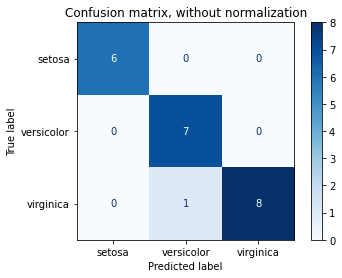

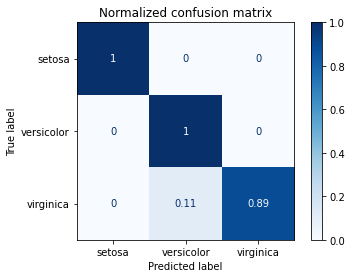

In [15]:
print("Teste de Acurácia do sklearn modelo 3: ",accuracy_score(y_test, modelo3.predict(X_test)))

print("Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo3, X_test, y_test,
                                 display_labels=['setosa','versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn modelo 4:  0.9545454545454546
Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[6 0 0]
 [0 7 0]
 [0 1 8]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.11111111 0.88888889]]


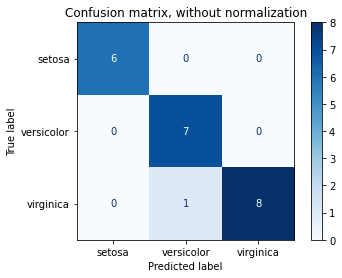

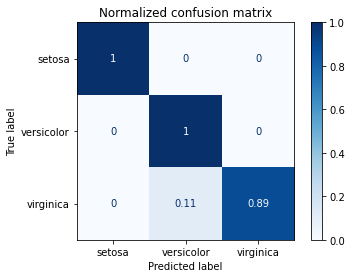

In [16]:
print("Teste de Acurácia do sklearn modelo 4: ",accuracy_score(y_test, modelo4.predict(X_test)))

print("Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo4, X_test, y_test,
                                 display_labels=['setosa','versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Questão 1, item f)
Escolhendo o melhor classificador como o 1, temos:
Score do modelo 1: 0.9733333333333334
Teste de Acurácia do sklearn modelo 1:  0.9733333333333334
Há um falso positivo, como podemos ver na matriz de confusão não-normalizada.
Confusion matrix, without normalization
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.96 0.04]
 [0.   0.04 0.96]]


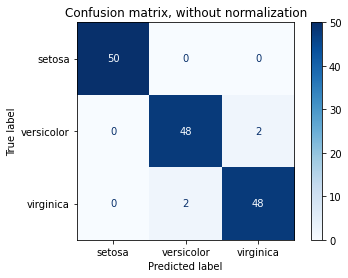

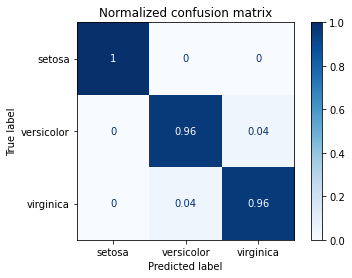

In [17]:
print("Questão 1, item f)")
print("Escolhendo o melhor classificador como o 1, temos:")

print("Score do modelo 1:",modelo1.score(X, y))

print("Teste de Acurácia do sklearn modelo 1: ",accuracy_score(y, modelo1.predict(X)))

print("Há dois falsos positivos e dois falsos negativos, como podemos ver na matriz de confusão não-normalizada.")

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo1, X, y,
                                 display_labels=['setosa','versicolor', 'virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [18]:
print("Questão 1, item g)")
print("O modelo SVM apresentou um erro a mais que o modelo de redes da atividade passada.")

Questão 1, item g)
O modelo SVM apresentou um erro a mais que o modelo de redes da atividade passada.


In [19]:
print("Questão 2: inicialização do banco de dados.")

X2_train = pd.DataFrame(
    {'clumpThickness' : [1, 10, 1, 5, 3, 10, 3, 5, 1, 6, 10, 1, 1, 3, 10, 4, 10, 3, 1, 3, 1, 7, 2, 8, 3, 7, 4, 1, 5, 1, 5, 6, 1, 4, 6, 5, 1, 3, 1, 4, 5, 8, 2, 4, 4, 5, 9, 6, 4, 1, 5, 10, 2, 5, 3, 10, 4, 1, 5, 4, 4, 3, 5, 9, 5, 2, 2, 5, 7, 1, 5, 5, 2, 8, 5, 7, 3, 7, 5, 5, 4, 4, 3, 8, 3, 10, 1, 1, 10, 5, 3, 1, 2, 5, 4, 5, 7, 10, 3, 8, 4, 5, 5, 5, 2, 1, 8, 5, 1, 4, 8, 10, 3, 4, 5, 3, 10, 1, 4, 1, 4, 3, 3, 1, 5, 1, 10, 1, 4, 4, 7, 2, 1, 3, 5, 1, 1, 4, 5, 5, 1, 4, 5, 5, 1, 1, 3, 1, 6, 10, 2, 3, 8, 7, 3, 3, 2, 10, 6, 1, 1, 1, 10, 3, 10, 5, 1, 4, 10, 1, 1, 5, 5, 8, 10, 4, 10, 7, 3, 1, 1, 4, 4, 10, 1, 7, 5, 4, 4, 4, 3, 1, 8, 1, 3, 3, 5, 1, 3, 3, 1, 10, 2, 5, 8, 9, 4, 1, 10, 5, 6, 1, 5, 3, 5, 1, 1, 1, 6, 5, 3, 3, 2, 4, 3, 7, 1, 10, 6, 8, 1, 8, 10, 5, 10, 8, 1, 3, 2, 5, 2, 5, 5, 3, 8, 1, 3, 5, 4, 4, 4, 7, 2, 2, 7, 1, 3, 5, 3, 6, 5, 1, 1, 5, 2, 1, 1, 5, 10, 7, 5, 1, 3, 1, 5, 4, 10, 5, 4, 1, 5, 1, 2, 1, 4, 3, 8, 10, 1, 2, 3, 6, 4, 6, 3, 6, 1, 3, 10, 5, 6, 1, 1, 9, 1, 1, 10, 8, 2, 5, 4, 8, 3, 2, 5, 3, 10, 10, 5, 10, 5, 1, 5, 1, 10, 1, 5, 1, 1, 1, 7, 8, 8, 5, 8, 4, 2, 1, 2, 5, 8, 8, 2, 1, 1, 2, 4, 3, 3, 3, 1, 10, 10, 3, 5, 2, 2, 4, 5, 2, 1, 5, 10, 8, 5, 2, 1, 3, 1, 4, 5, 7, 1, 3, 4, 3, 6, 5, 6, 5, 3, 6, 5, 5, 7, 3, 1, 2, 5, 3, 3, 1, 5, 4, 9, 3, 6, 5, 4, 4, 1, 3, 5, 10, 5, 4, 10, 2, 10, 3, 8, 5, 6, 1, 4, 5, 3, 10, 8, 2, 8, 5, 10, 4, 8, 3, 5, 1, 5, 5, 5, 1, 1, 10, 5, 5, 1, 4, 6, 5, 3, 10, 1, 4, 2, 2, 3, 4, 1, 5, 4, 10, 9, 1, 10, 7, 2, 2, 4, 5, 3, 8, 5, 9, 1, 2, 8, 10, 4, 3, 3, 5, 10, 3, 9, 8, 5, 6],
'uniformityOfCellSize' : [1, 4, 1, 4, 1, 3, 6, 1, 1, 1, 5, 2, 2, 2, 3, 1, 10, 1, 1, 1, 1, 2, 1, 8, 1, 1, 1, 1, 1, 3, 1, 10, 1, 5, 1, 1, 1, 3, 1, 8, 1, 3, 3, 1, 1, 1, 10, 1, 1, 1, 3, 4, 1, 1, 1, 10, 2, 1, 6, 1, 1, 1, 1, 10, 2, 1, 1, 1, 5, 1, 10, 3, 1, 4, 1, 4, 1, 5, 10, 1, 1, 1, 1, 10, 1, 3, 1, 1, 5, 10, 7, 2, 1, 4, 1, 1, 8, 3, 1, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 10, 9, 3, 1, 4, 1, 10, 1, 4, 4, 2, 1, 3, 1, 6, 1, 9, 1, 1, 3, 4, 1, 1, 1, 8, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 5, 10, 1, 2, 5, 4, 1, 1, 1, 10, 1, 1, 1, 1, 10, 1, 10, 3, 1, 1, 10, 1, 6, 1, 8, 9, 5, 1, 3, 8, 3, 1, 1, 2, 2, 4, 1, 3, 1, 1, 8, 3, 1, 3, 6, 1, 1, 1, 1, 2, 1, 10, 1, 10, 1, 1, 10, 9, 7, 1, 10, 4, 10, 2, 7, 4, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 5, 1, 6, 2, 10, 1, 3, 6, 10, 10, 6, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 7, 1, 2, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 10, 8, 2, 1, 4, 1, 7, 1, 7, 1, 3, 1, 5, 1, 1, 1, 1, 1, 6, 8, 1, 1, 1, 10, 2, 1, 1, 8, 1, 1, 2, 1, 8, 1, 1, 5, 1, 1, 4, 7, 1, 1, 1, 4, 1, 1, 4, 1, 10, 6, 1, 8, 3, 2, 10, 1, 4, 1, 6, 2, 1, 1, 3, 10, 7, 7, 10, 1, 1, 1, 5, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 4, 3, 1, 1, 1, 4, 1, 3, 1, 1, 8, 4, 10, 1, 1, 1, 1, 1, 3, 5, 1, 2, 1, 1, 3, 2, 10, 8, 1, 10, 2, 3, 2, 4, 1, 3, 2, 1, 1, 1, 1, 1, 7, 1, 10, 1, 2, 1, 1, 1, 6, 7, 3, 8, 10, 1, 5, 2, 2, 1, 10, 1, 1, 1, 1, 10, 5, 1, 7, 3, 4, 1, 10, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 8, 6, 1, 7, 4, 1, 1, 7, 1, 5, 1, 1, 6, 4, 8, 6, 2, 5, 10, 3, 6, 10, 3, 9],
'uniformityOfCellShape' : [1, 7, 1, 6, 2, 5, 6, 1, 1, 3, 7, 2, 3, 1, 3, 1, 10, 1, 1, 1, 1, 4, 1, 9, 1, 2, 1, 1, 1, 1, 1, 5, 1, 5, 3, 1, 1, 2, 1, 6, 3, 8, 1, 1, 1, 1, 10, 1, 1, 1, 4, 6, 2, 1, 1, 10, 2, 1, 6, 1, 1, 1, 2, 10, 2, 1, 1, 1, 3, 1, 10, 4, 1, 4, 1, 5, 2, 6, 10, 1, 1, 1, 1, 10, 1, 4, 1, 1, 5, 10, 7, 2, 1, 5, 1, 1, 8, 5, 1, 9, 1, 2, 3, 3, 1, 1, 4, 1, 1, 1, 10, 8, 1, 1, 6, 1, 6, 1, 4, 3, 1, 1, 5, 2, 5, 1, 7, 1, 1, 3, 6, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 5, 10, 1, 2, 5, 7, 1, 1, 1, 8, 1, 1, 1, 1, 10, 1, 10, 3, 1, 1, 10, 1, 8, 1, 7, 9, 5, 1, 3, 3, 5, 1, 3, 1, 4, 4, 1, 2, 1, 1, 8, 2, 1, 3, 4, 1, 1, 1, 1, 3, 1, 7, 1, 10, 1, 1, 8, 10, 8, 1, 10, 4, 10, 1, 10, 5, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 6, 1, 6, 3, 10, 1, 5, 3, 10, 10, 5, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 7, 1, 2, 1, 3, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 2, 10, 7, 3, 1, 5, 1, 10, 2, 7, 1, 1, 1, 5, 1, 1, 1, 2, 1, 7, 4, 1, 1, 1, 10, 3, 1, 1, 7, 1, 1, 2, 1, 7, 1, 1, 8, 1, 1, 3, 8, 1, 1, 1, 10, 1, 1, 6, 1, 10, 5, 1, 7, 5, 3, 10, 2, 3, 1, 7, 2, 1, 1, 4, 10, 8, 9, 10, 1, 3, 1, 7, 1, 6, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 5, 2, 2, 1, 1, 2, 3, 4, 1, 1, 8, 6, 10, 1, 1, 1, 1, 4, 6, 6, 1, 2, 1, 1, 2, 2, 10, 8, 1, 10, 2, 1, 4, 4, 1, 1, 2, 1, 1, 1, 3, 1, 7, 1, 10, 1, 1, 1, 1, 1, 6, 7, 5, 7, 8, 1, 5, 1, 3, 1, 10, 1, 1, 1, 1, 10, 6, 1, 8, 3, 6, 2, 10, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 8, 3, 4, 1, 7, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 2, 1, 10, 4, 1, 10, 4, 1, 1, 5, 4, 5, 1, 1, 4, 5, 6, 4, 2, 5, 10, 6, 9, 10, 3, 7],
'marginalAdhesion' : [1, 2, 3, 6, 1, 4, 6, 1, 1, 1, 3, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 10, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 1, 8, 2, 1, 1, 1, 1, 2, 1, 2, 3, 7, 1, 10, 1, 2, 1, 1, 10, 2, 3, 3, 1, 1, 1, 1, 10, 1, 5, 1, 1, 6, 6, 4, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 7, 7, 1, 1, 8, 1, 3, 1, 4, 10, 1, 1, 2, 1, 6, 1, 3, 1, 1, 1, 4, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 7, 1, 3, 5, 4, 1, 1, 1, 6, 3, 1, 1, 1, 3, 1, 10, 1, 1, 1, 10, 1, 10, 1, 7, 5, 6, 1, 1, 7, 2, 1, 1, 1, 3, 10, 1, 10, 3, 1, 5, 1, 2, 2, 10, 1, 1, 3, 1, 1, 1, 8, 1, 10, 2, 1, 8, 3, 3, 1, 6, 5, 10, 3, 10, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 10, 1, 2, 1, 1, 1, 4, 6, 9, 3, 4, 2, 1, 1, 2, 1, 8, 1, 1, 9, 1, 1, 1, 2, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 2, 10, 4, 2, 4, 1, 3, 1, 6, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 3, 4, 1, 1, 1, 2, 5, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 5, 2, 1, 10, 3, 1, 8, 1, 4, 5, 1, 5, 1, 10, 1, 8, 1, 1, 1, 4, 10, 5, 8, 8, 1, 2, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 3, 10, 1, 2, 2, 1, 1, 1, 10, 1, 3, 1, 1, 1, 2, 10, 8, 1, 10, 2, 2, 1, 10, 2, 1, 4, 3, 1, 1, 1, 1, 5, 1, 2, 3, 1, 3, 1, 1, 2, 3, 1, 10, 10, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 8, 2, 1, 7, 2, 4, 1, 10, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 5, 2, 3, 1, 6, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 6, 1, 1, 8, 1, 10, 2, 2, 1, 10, 1, 2, 1, 1, 3, 5, 3, 10, 1, 6, 2, 4, 2, 10, 3, 5],
'singleEpithelialCellSize' : [2, 2, 2, 4, 2, 3, 5, 2, 2, 4, 3, 2, 2, 2, 2, 2, 10, 2, 2, 2, 2, 3, 2, 5, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 2, 4, 5, 2, 2, 3, 10, 2, 2, 2, 4, 2, 2, 1, 2, 6, 2, 1, 6, 2, 2, 2, 2, 10, 2, 2, 2, 2, 4, 2, 5, 8, 2, 2, 2, 2, 2, 3, 8, 2, 2, 2, 2, 8, 2, 3, 2, 2, 3, 10, 4, 2, 2, 8, 2, 2, 3, 10, 2, 6, 2, 2, 2, 2, 2, 1, 5, 2, 1, 2, 10, 6, 2, 2, 4, 2, 3, 2, 6, 4, 2, 2, 3, 2, 10, 2, 4, 2, 2, 2, 6, 1, 1, 1, 5, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 4, 9, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 10, 2, 3, 2, 2, 2, 6, 1, 8, 2, 10, 3, 8, 2, 2, 4, 3, 2, 2, 2, 2, 6, 2, 5, 2, 3, 4, 3, 3, 2, 10, 1, 1, 2, 2, 2, 3, 5, 2, 10, 2, 2, 4, 6, 4, 1, 8, 7, 4, 2, 5, 6, 2, 2, 2, 2, 4, 2, 2, 1, 3, 2, 2, 5, 3, 4, 2, 3, 2, 5, 4, 6, 10, 3, 1, 2, 2, 2, 2, 5, 2, 2, 3, 2, 3, 5, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 10, 3, 2, 2, 4, 8, 4, 2, 2, 7, 2, 5, 2, 5, 2, 2, 2, 5, 2, 1, 2, 2, 3, 3, 4, 2, 2, 2, 8, 3, 1, 1, 6, 2, 2, 2, 2, 6, 2, 1, 2, 2, 2, 3, 5, 2, 2, 2, 4, 2, 2, 2, 2, 6, 5, 2, 3, 3, 2, 4, 2, 3, 2, 8, 2, 2, 2, 3, 6, 10, 6, 5, 2, 2, 2, 4, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 3, 3, 2, 2, 2, 2, 2, 2, 10, 2, 3, 3, 10, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 1, 10, 5, 2, 8, 3, 2, 6, 5, 1, 2, 2, 1, 2, 2, 2, 2, 5, 2, 8, 2, 2, 2, 1, 2, 4, 8, 8, 4, 6, 2, 6, 1, 6, 2, 8, 1, 2, 1, 2, 2, 3, 2, 5, 3, 5, 2, 7, 1, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 1, 2, 2, 8, 2, 2, 1, 1, 3, 4, 2, 3, 10, 2, 7, 2, 2, 2, 7, 2, 2, 1, 2, 5, 5, 4, 3, 2, 3, 10, 5, 10, 6, 6, 5],
'bareNuclei' : [1, 8, 3, 10, 1, 7, 10, 1, 1, 5, 7, 1, 1, 2, 10, 1, 1, 1, 1, 1, 1, 4, 1, 10, 1, 1, 1, 1, 1, 1, 1, 10, 1, 10, 1, 1, 1, 3, 1, 4, 2, 9, 1, 1, 1, 2, 10, 1, 1, 1, 1, 10, 1, 1, 1, 8, 1, 1, 10, 1, 3, 1, 1, 8, 2, 1, 1, 1, 10, 1, 2, 10, 1, 9, 1, 10, 1, 8, 1, 1, 1, 1, 5, 10, 1, 10, 1, 1, 10, 10, 9, 1, 1, 1, 1, 1, 10, 5, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 4, 1, 1, 1, 1, 10, 1, 5, 10, 1, 1, 10, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 10, 10, 1, 1, 10, 7, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 10, 1, 1, 1, 10, 1, 10, 1, 10, 5, 8, 1, 10, 5, 10, 1, 1, 2, 2, 10, 10, 10, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 10, 1, 1, 8, 10, 10, 1, 4, 10, 10, 1, 10, 8, 1, 1, 1, 2, 10, 1, 1, 1, 1, 1, 1, 10, 1, 10, 1, 6, 1, 10, 10, 10, 10, 10, 1, 1, 1, 1, 1, 10, 1, 2, 10, 1, 1, 8, 1, 1, 1, 10, 1, 5, 10, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 1, 2, 5, 1, 8, 7, 4, 3, 1, 10, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 10, 8, 1, 1, 8, 1, 1, 6, 1, 8, 1, 3, 3, 1, 1, 3, 10, 1, 1, 1, 4, 1, 1, 10, 1, 1, 10, 1, 10, 3, 1, 5, 1, 10, 1, 10, 1, 2, 3, 3, 10, 10, 10, 10, 1, 1, 1, 10, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 5, 1, 5, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 1, 4, 1, 10, 10, 4, 10, 1, 1, 10, 1, 3, 1, 4, 1, 1, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 10, 5, 10, 10, 5, 1, 7, 1, 3, 1, 10, 1, 3, 1, 1, 10, 10, 1, 5, 1, 10, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 5, 1, 1, 5, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 10, 1, 10, 10, 1, 10, 3, 1, 1, 9, 1, 2, 1, 1, 9, 10, 10, 3, 1, 10, 10, 8, 6, 10, 10, 8],
'blandChromatin' : [1, 6, 1, 4, 3, 3, 6, 2, 1, 5, 3, 1, 2, 3, 7, 2, 8, 2, 3, 2, 1, 3, 3, 7, 3, 2, 2, 3, 2, 2, 1, 6, 2, 7, 3, 3, 1, 3, 3, 10, 2, 8, 1, 3, 1, 2, 10, 2, 2, 3, 3, 5, 3, 2, 2, 7, 2, 2, 4, 2, 1, 3, 1, 3, 3, 3, 3, 1, 7, 1, 8, 4, 3, 3, 1, 3, 1, 7, 5, 3, 3, 3, 1, 10, 1, 4, 1, 2, 7, 10, 4, 2, 1, 3, 3, 1, 7, 3, 2, 10, 1, 3, 3, 4, 2, 2, 5, 3, 3, 2, 7, 7, 1, 1, 8, 3, 4, 3, 7, 5, 2, 3, 7, 4, 3, 1, 7, 1, 1, 3, 4, 3, 3, 2, 9, 3, 3, 1, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 3, 7, 1, 1, 4, 7, 3, 1, 2, 8, 1, 2, 3, 1, 8, 1, 10, 2, 2, 3, 8, 3, 5, 1, 5, 7, 7, 1, 7, 7, 7, 3, 1, 3, 2, 5, 3, 5, 1, 1, 10, 2, 1, 7, 3, 1, 2, 2, 3, 3, 1, 7, 2, 4, 1, 2, 7, 7, 9, 1, 8, 3, 7, 1, 10, 4, 3, 3, 1, 1, 7, 2, 1, 2, 2, 1, 3, 7, 1, 9, 1, 3, 2, 1, 7, 7, 9, 6, 1, 2, 1, 2, 1, 8, 2, 3, 3, 1, 2, 3, 1, 2, 3, 7, 1, 1, 9, 2, 2, 1, 2, 3, 3, 2, 1, 7, 2, 1, 5, 2, 8, 3, 3, 1, 4, 1, 7, 2, 5, 2, 4, 2, 4, 1, 2, 1, 2, 2, 3, 3, 1, 2, 2, 7, 7, 1, 2, 8, 1, 2, 1, 3, 8, 3, 1, 2, 3, 1, 6, 9, 3, 2, 3, 7, 1, 2, 4, 1, 2, 8, 1, 7, 4, 1, 4, 2, 7, 2, 3, 1, 2, 3, 3, 10, 7, 8, 7, 1, 2, 1, 7, 2, 5, 3, 3, 2, 2, 3, 1, 1, 2, 2, 3, 3, 7, 1, 3, 2, 3, 2, 2, 2, 1, 2, 8, 4, 10, 1, 3, 1, 3, 1, 1, 5, 3, 3, 3, 3, 4, 2, 8, 7, 1, 10, 1, 2, 5, 3, 1, 2, 1, 3, 1, 2, 2, 2, 7, 1, 7, 1, 1, 3, 3, 2, 3, 7, 5, 7, 10, 3, 7, 2, 7, 1, 7, 2, 2, 1, 2, 4, 6, 3, 5, 3, 7, 1, 4, 1, 2, 1, 1, 3, 3, 3, 3, 5, 1, 1, 1, 10, 1, 4, 2, 4, 2, 2, 1, 1, 5, 3, 2, 1, 2, 3, 7, 1, 5, 9, 1, 4, 2, 2, 2, 5, 3, 5, 1, 1, 3, 4, 7, 3, 2, 3, 5, 4, 2, 10, 3, 4],
'normalNucleoli' : [1, 1, 1, 3, 1, 5, 8, 1, 1, 10, 3, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 1, 2, 1, 10, 1, 5, 1, 1, 1, 1, 1, 6, 3, 9, 1, 6, 1, 2, 10, 1, 1, 1, 1, 3, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 1, 3, 2, 1, 1, 1, 5, 1, 5, 9, 1, 3, 1, 8, 1, 4, 10, 1, 1, 2, 1, 7, 1, 1, 1, 1, 9, 6, 8, 1, 1, 6, 1, 1, 2, 10, 1, 10, 1, 1, 1, 4, 1, 1, 4, 2, 1, 1, 3, 10, 1, 1, 10, 1, 3, 1, 3, 6, 1, 1, 1, 2, 1, 1, 7, 1, 1, 3, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 4, 10, 1, 1, 3, 6, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 7, 1, 7, 7, 1, 1, 6, 8, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 4, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 4, 1, 10, 1, 1, 7, 10, 1, 1, 5, 2, 10, 2, 10, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 2, 9, 1, 7, 1, 9, 1, 6, 8, 10, 10, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 4, 1, 1, 2, 4, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 10, 8, 6, 1, 6, 1, 5, 1, 7, 1, 8, 3, 3, 1, 1, 1, 1, 2, 4, 10, 1, 1, 1, 3, 6, 1, 1, 9, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 5, 10, 1, 1, 1, 10, 1, 1, 1, 1, 8, 6, 1, 9, 10, 1, 4, 1, 1, 1, 10, 1, 1, 1, 2, 10, 2, 10, 8, 2, 1, 1, 6, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 2, 1, 1, 1, 1, 1, 5, 1, 2, 7, 3, 10, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 10, 8, 1, 10, 3, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1, 1, 1, 6, 4, 3, 5, 3, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 1, 6, 1, 10, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2, 7, 1, 1, 5, 1, 9, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 4, 3, 1, 3, 4, 9, 10, 1, 2],
'mitoses' : [1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 8, 1, 1, 1, 3, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 8, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 8, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 10, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 4, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 7, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 8, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 7, 1, 1, 3, 1, 7, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 10, 1, 1, 1]
}
)

y2_train = [2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2]

X2_test = pd.DataFrame(
    {'clumpThickness' : [1, 4, 4, 1, 1, 1, 5, 7, 10, 3, 10, 7, 8, 3, 6, 9, 10, 1, 3, 1, 4, 4, 1, 10, 4, 5, 1, 3, 4, 10, 5, 3, 3, 5, 5, 4, 1, 8, 10, 9, 1, 6, 7, 1, 5, 2, 1, 1, 10, 5, 2, 3, 3, 10, 1, 1, 3, 3, 1, 10, 10, 1, 1, 2, 10, 1, 6, 9, 2, 5, 5, 7, 5, 8, 3, 4, 6, 5, 9, 4, 4, 8, 3, 10, 8, 4, 5, 4, 6, 4, 10, 10, 8, 6, 9, 3, 1, 6, 5, 5, 5, 7, 3, 3, 5, 1, 6, 8, 5, 3, 2, 8, 1, 6, 1, 8, 1, 1, 1, 8, 1, 9, 3, 1, 5, 1, 3, 5, 3, 1, 1, 3, 5, 5, 8, 1, 3, 2, 5, 1, 3, 1, 5, 4, 3, 5, 4, 1, 2, 3, 5, 4, 4, 2, 4, 4, 3, 10, 2, 1, 5, 10, 5, 8, 1, 5, 5, 1, 1, 10, 5, 3, 4, 5, 5, 1, 6, 3, 3, 2, 3, 10, 6, 10, 3, 8, 3, 6, 3, 4, 1, 1, 4, 2, 3, 3, 4, 5, 2, 5, 3, 10, 5, 1, 3],
'uniformityOfCellSize' : [1, 1, 1, 1, 1, 1, 1, 5, 6, 3, 5, 9, 7, 1, 1, 8, 10, 1, 1, 1, 1, 1, 1, 5, 5, 4, 5, 1, 6, 5, 3, 1, 1, 1, 2, 1, 1, 10, 10, 8, 1, 3, 4, 1, 8, 2, 1, 1, 8, 2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 5, 1, 1, 3, 4, 1, 5, 10, 5, 10, 1, 8, 3, 2, 1, 1, 1, 1, 5, 1, 10, 4, 1, 3, 7, 1, 1, 1, 3, 1, 10, 10, 10, 10, 4, 2, 1, 2, 10, 1, 3, 6, 1, 2, 8, 1, 3, 4, 1, 2, 1, 10, 1, 6, 1, 8, 1, 1, 1, 10, 1, 10, 1, 1, 1, 1, 1, 7, 5, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 6, 1, 2, 5, 10, 10, 10, 1, 10, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 8, 2, 1, 1, 1, 8, 10, 4, 1, 10, 1, 1, 1, 1, 1, 1, 1, 3, 10, 1, 1, 1, 1, 1, 1, 8, 4, 1, 1],
'uniformityOfCellShape' : [1, 1, 2, 1, 1, 1, 3, 10, 6, 2, 6, 4, 4, 1, 1, 8, 10, 1, 1, 1, 2, 1, 4, 10, 5, 4, 8, 1, 6, 8, 2, 2, 1, 1, 1, 1, 1, 10, 7, 8, 1, 3, 4, 2, 8, 2, 1, 1, 8, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 4, 7, 1, 1, 2, 4, 1, 4, 10, 3, 10, 1, 7, 3, 1, 1, 3, 1, 1, 5, 1, 4, 4, 1, 6, 8, 1, 2, 3, 3, 1, 10, 10, 5, 7, 5, 1, 1, 1, 6, 1, 1, 6, 1, 2, 9, 1, 4, 4, 3, 2, 1, 10, 1, 7, 1, 7, 1, 3, 1, 4, 1, 10, 1, 1, 1, 1, 1, 4, 7, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 10, 1, 1, 1, 8, 10, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 10, 10, 10, 1, 8, 1, 1, 3, 2, 1, 4, 1, 1, 3, 1, 8, 1, 1, 1, 1, 10, 2, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 8, 6, 1, 2],
'marginalAdhesion' : [1, 1, 1, 1, 1, 1, 1, 10, 3, 6, 10, 10, 4, 1, 3, 5, 7, 1, 1, 1, 1, 1, 1, 3, 8, 9, 6, 1, 5, 10, 4, 1, 1, 3, 1, 1, 1, 8, 8, 9, 1, 5, 3, 2, 10, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 10, 4, 1, 1, 2, 6, 1, 4, 10, 3, 10, 6, 6, 1, 1, 1, 1, 1, 6, 4, 1, 7, 1, 1, 2, 2, 3, 1, 3, 3, 1, 10, 8, 3, 7, 10, 2, 1, 1, 1, 3, 1, 3, 1, 2, 4, 1, 1, 5, 1, 1, 1, 10, 1, 10, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 8, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 8, 1, 1, 10, 1, 1, 1, 7, 10, 1, 1, 1, 1, 3, 1, 3, 1, 3, 8, 10, 3, 8, 1, 10, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 10, 8, 10, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 10, 1, 1, 2, 1, 1, 1, 4, 7, 1, 1],
'singleEpithelialCellSize' : [2, 1, 2, 2, 1, 1, 2, 10, 4, 3, 6, 10, 5, 2, 2, 6, 10, 2, 2, 1, 2, 2, 2, 5, 6, 2, 5, 2, 7, 3, 2, 2, 2, 4, 2, 2, 2, 7, 7, 6, 1, 3, 4, 2, 5, 1, 2, 2, 8, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 10, 6, 4, 3, 4, 3, 5, 2, 2, 2, 3, 4, 2, 3, 6, 2, 3, 4, 2, 2, 2, 3, 2, 5, 6, 8, 6, 6, 2, 2, 1, 10, 2, 2, 2, 2, 2, 3, 2, 5, 4, 2, 4, 1, 5, 2, 3, 2, 10, 2, 2, 2, 8, 2, 10, 2, 2, 2, 2, 2, 6, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 6, 2, 2, 2, 6, 10, 2, 2, 2, 3, 1, 2, 10, 2, 2, 6, 7, 7, 6, 2, 8, 2, 2, 1, 3, 2, 2, 2, 2, 6, 2, 3, 2, 2, 3, 2, 6, 10, 4, 2, 6, 3, 2, 2, 2, 2, 2, 2, 3, 6, 2, 2, 2, 2, 2, 2, 10, 9, 1, 2],
'bareNuclei' : [1, 1, 1, 1, 1, 1, 1, 10, 5, 3, 10, 3, 3, 1, 1, 2, 10, 1, 1, 1, 1, 2, 1, 8, 10, 10, 8, 1, 6, 10, 1, 1, 1, 1, 1, 1, 1, 10, 1, 3, 1, 10, 10, 1, 10, 1, 1, 1, 10, 1, 1, 1, 1, 10, 1, 1, 1, 1, 3, 10, 10, 5, 1, 2, 10, 1, 9, 5, 7, 10, 1, 3, 3, 1, 2, 1, 1, 1, 5, 1, 10, 10, 1, 5, 2, 1, 1, 1, 2, 1, 10, 1, 4, 4, 10, 1, 1, 1, 4, 1, 1, 10, 5, 1, 10, 1, 2, 7, 1, 3, 1, 10, 1, 10, 1, 10, 1, 1, 1, 10, 1, 8, 3, 1, 1, 1, 1, 1, 9, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 10, 1, 1, 1, 9, 10, 1, 1, 1, 1, 5, 1, 10, 1, 1, 10, 10, 3, 9, 1, 10, 1, 5, 1, 2, 1, 1, 1, 2, 10, 1, 4, 1, 1, 1, 1, 1, 2, 10, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 2, 1, 1, 1, 10, 7, 1, 1],
'blandChromatin' : [3, 2, 2, 3, 1, 2, 2, 4, 3, 3, 7, 5, 5, 2, 1, 4, 8, 2, 2, 2, 3, 3, 2, 7, 10, 5, 7, 1, 7, 5, 1, 2, 1, 3, 1, 2, 1, 9, 10, 4, 1, 3, 6, 3, 8, 7, 2, 1, 4, 3, 2, 1, 2, 5, 2, 2, 2, 2, 1, 5, 8, 5, 2, 3, 2, 3, 7, 10, 7, 5, 2, 8, 3, 1, 7, 2, 3, 1, 4, 1, 9, 2, 2, 4, 5, 1, 1, 1, 6, 2, 10, 8, 4, 8, 4, 3, 3, 7, 4, 1, 1, 7, 5, 4, 7, 3, 3, 7, 1, 2, 1, 8, 3, 8, 3, 7, 2, 1, 3, 8, 2, 3, 3, 1, 3, 1, 1, 7, 7, 1, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 2, 1, 7, 2, 3, 6, 2, 2, 1, 9, 10, 3, 2, 2, 2, 2, 2, 9, 2, 2, 7, 7, 8, 3, 3, 3, 3, 1, 2, 4, 2, 1, 3, 3, 5, 2, 3, 2, 3, 2, 1, 3, 7, 10, 2, 3, 1, 3, 3, 2, 2, 2, 3, 1, 5, 3, 1, 3, 2, 2, 3, 8, 8, 3, 2],
'normalNucleoli' : [1, 1, 1, 1, 3, 1, 1, 10, 6, 5, 7, 3, 10, 1, 1, 10, 2, 1, 1, 1, 1, 2, 1, 8, 7, 6, 10, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 7, 10, 1, 1, 5, 9, 1, 10, 1, 1, 1, 8, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 9, 1, 1, 1, 3, 2, 8, 10, 5, 6, 1, 8, 3, 1, 1, 1, 1, 1, 3, 1, 10, 5, 1, 10, 10, 1, 1, 1, 1, 1, 10, 9, 10, 10, 8, 1, 1, 1, 10, 1, 1, 1, 1, 2, 1, 1, 9, 8, 1, 1, 1, 10, 1, 10, 1, 8, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 4, 2, 2, 1, 1, 1, 1, 1, 3, 1, 10, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 10, 2, 1, 4, 10, 10, 10, 1, 6, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 7, 2, 1, 1, 1, 1, 8, 1, 1, 10, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1],
'mitoses' : [1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 10, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 10, 1, 3, 1, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 7, 1, 3, 2, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 6, 1, 2, 1, 7, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 10, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
}
)

y2_test = [2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2]


Questão 2: inicialização do banco de dados.


In [20]:
print("Modelo com kernel rbf e estratégia um contra um.")
modelo5 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',decision_function_shape='ovo'))
modelo5.fit(X2_train, y2_train)

print("Modelo com kernel rbf e estratégia um contra todos.")
modelo6 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',decision_function_shape='ovr'))
modelo6.fit(X2_train, y2_train)

print("Modelo com kernel sigmoid e estratégia um contra um.")
modelo7 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid',decision_function_shape='ovo'))
modelo7.fit(X2_train, y2_train)

print("Modelo com kernel sigmoid e estratégia um contra todos.")
modelo8 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid',decision_function_shape='ovr'))
modelo8.fit(X2_train, y2_train)

Modelo com kernel rbf e estratégia um contra um.
Modelo com kernel rbf e estratégia um contra todos.
Modelo com kernel sigmoid e estratégia um contra um.
Modelo com kernel sigmoid e estratégia um contra todos.


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='sigmoid', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [23]:
print("Avaliando os modelos criados.")
print(modelo5.score(X2_test, y2_test))
print(modelo6.score(X2_test, y2_test))
print(modelo7.score(X2_test, y2_test))
print(modelo8.score(X2_test, y2_test))

Avaliando os modelos criados.
0.9609756097560975
0.9609756097560975
0.9658536585365853
0.9658536585365853


Teste de Acurácia do sklearn do modelo 5:  0.9609756097560975
Confusion matrix, without normalization
[[129   5]
 [  3  68]]
Normalized confusion matrix
[[0.96268657 0.03731343]
 [0.04225352 0.95774648]]


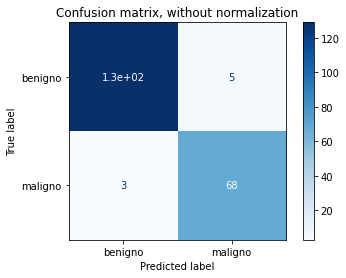

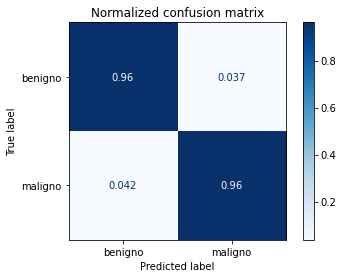

In [30]:
print("Teste de Acurácia do sklearn do modelo 5: ",accuracy_score(y2_test, modelo5.predict(X2_test)))

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo5, X2_test, y2_test,
                                 display_labels=['benigno','maligno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn do modelo 6:  0.9609756097560975
Confusion matrix, without normalization
[[129   5]
 [  3  68]]
Normalized confusion matrix
[[0.96268657 0.03731343]
 [0.04225352 0.95774648]]


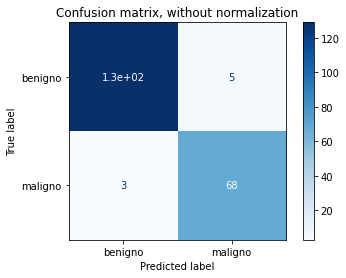

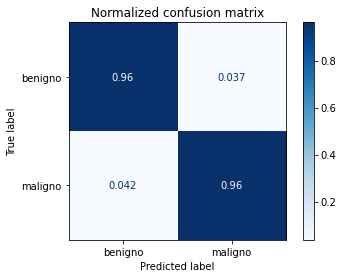

In [31]:
print("Teste de Acurácia do sklearn do modelo 6: ",accuracy_score(y2_test, modelo6.predict(X2_test)))

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo6, X2_test, y2_test,
                                 display_labels=['benigno','maligno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn do modelo 7:  0.9658536585365853
Confusion matrix, without normalization
[[131   3]
 [  4  67]]
Normalized confusion matrix
[[0.97761194 0.02238806]
 [0.05633803 0.94366197]]


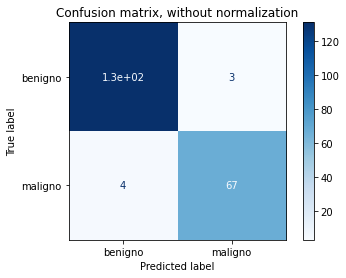

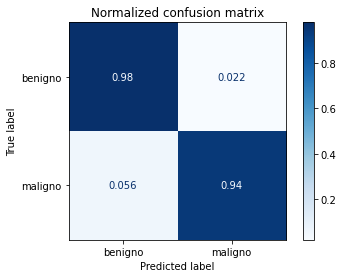

In [33]:
print("Teste de Acurácia do sklearn do modelo 7: ",accuracy_score(y2_test, modelo7.predict(X2_test)))

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo7, X2_test, y2_test,
                                 display_labels=['benigno','maligno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Teste de Acurácia do sklearn do modelo 8:  0.9658536585365853
Confusion matrix, without normalization
[[131   3]
 [  4  67]]
Normalized confusion matrix
[[0.97761194 0.02238806]
 [0.05633803 0.94366197]]


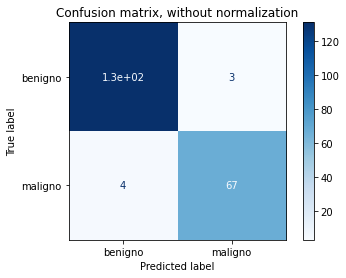

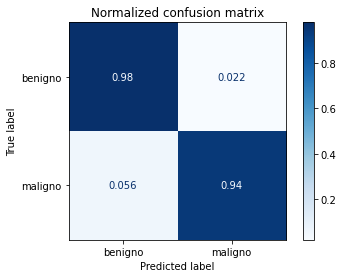

In [34]:
print("Teste de Acurácia do sklearn do modelo 8: ",accuracy_score(y2_test, modelo8.predict(X2_test)))

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelo8, X2_test, y2_test,
                                 display_labels=['benigno','maligno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [35]:
print("Podemos ver que os modelos 7 e 8 atingiram acurácia próxima às do modelo de rede escolhida na última atividade.")

Podemos ver que os modelos 7 e 8 atingiram acurácia próxima às do modelo de rede escolhida na última atividade.
